In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
pd.set_option('display.max_columns', None)

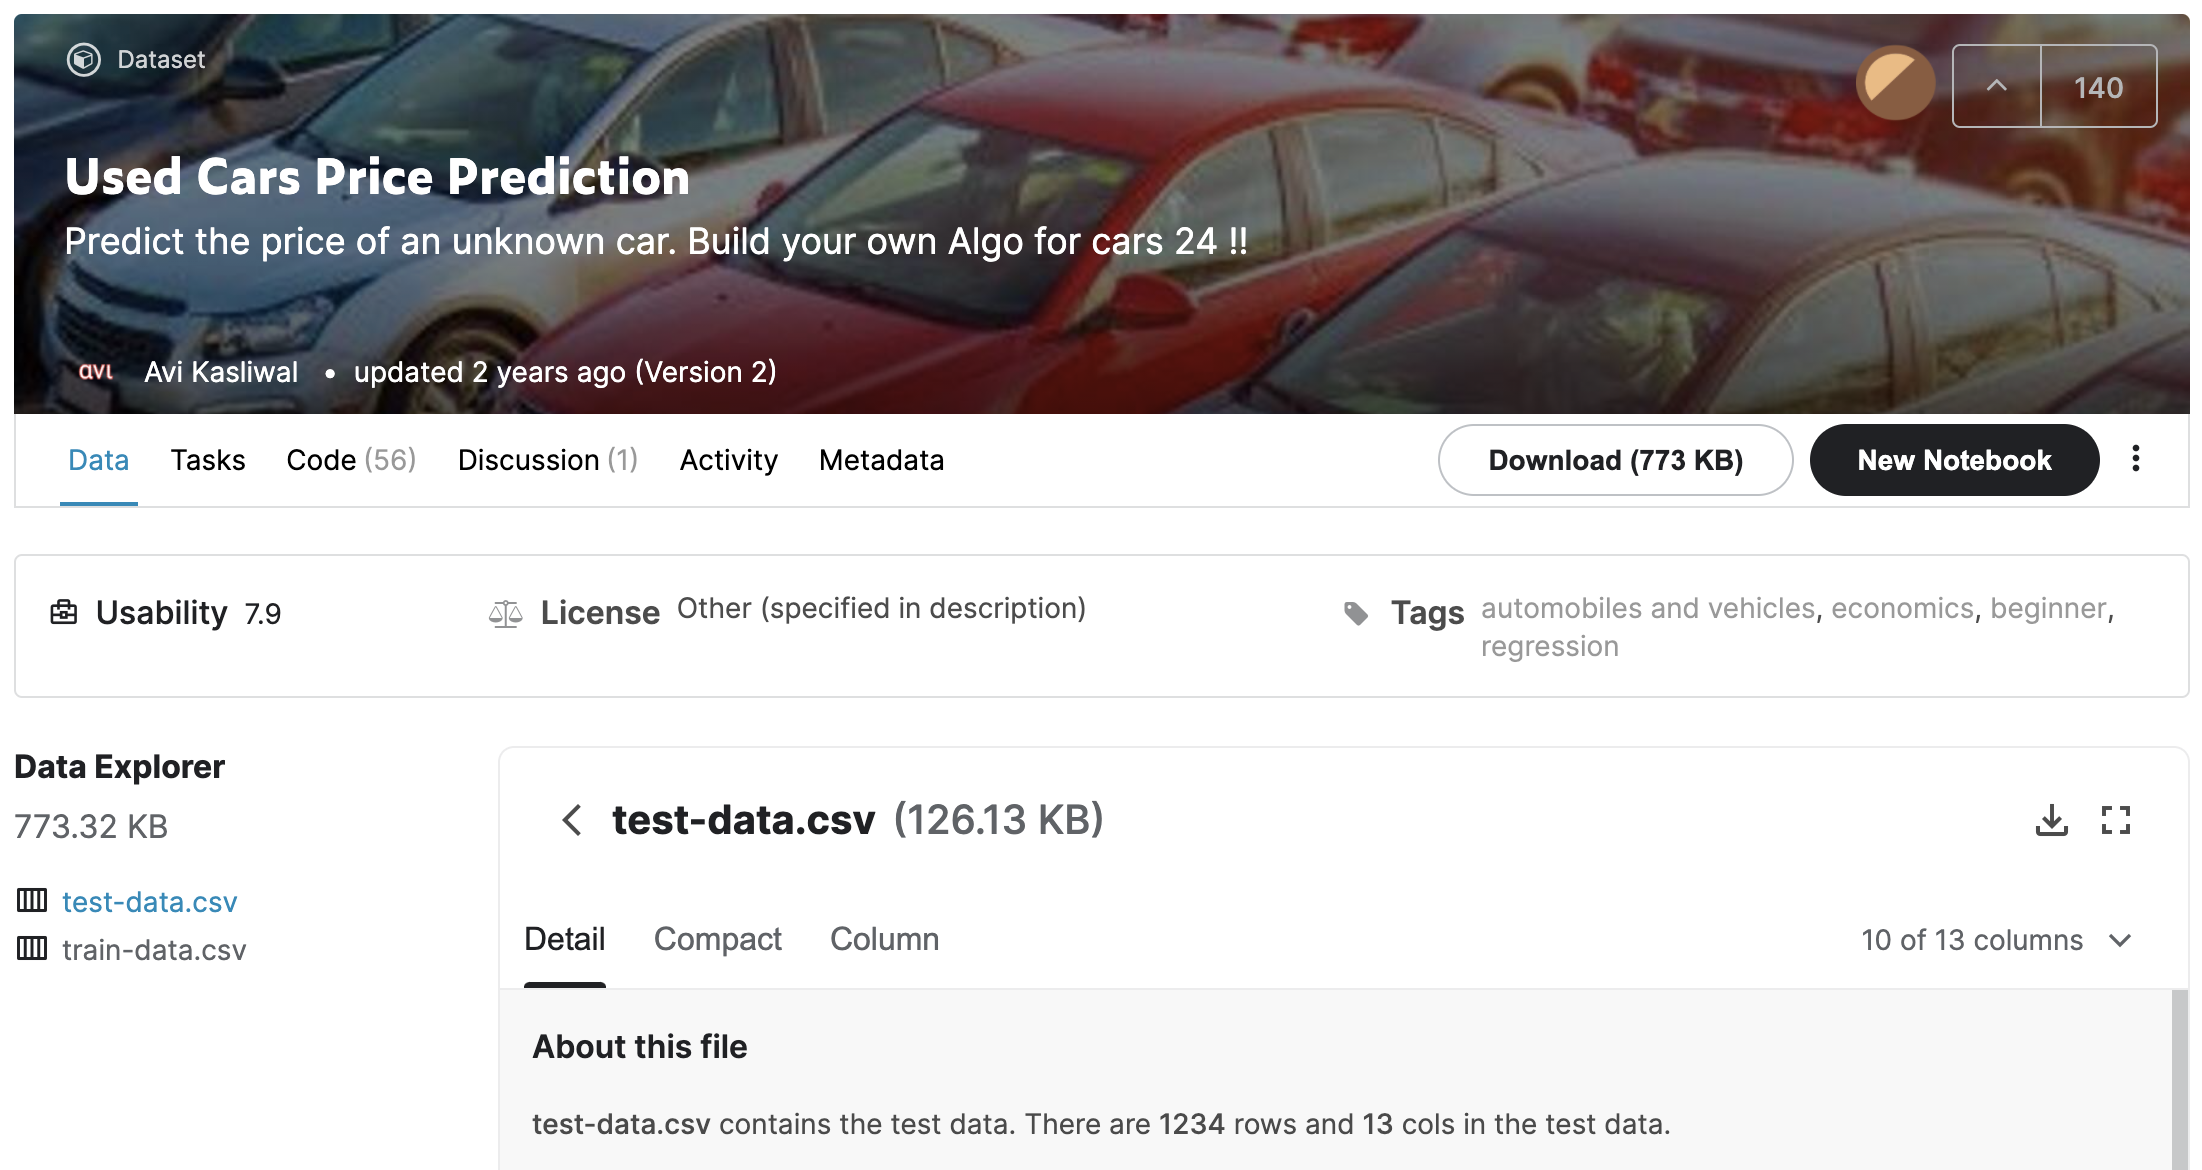

In [3]:
car_t = pd.read_csv('./train_data_r.csv')
car_tr = pd.read_csv('./train_data_n.csv')

In [4]:
car_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
car_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             6019 non-null   object 
 10  Power              6019 non-null   object 
 11  Seats              6019 non-null   int64  
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(1), int64(4), object(9)
memory usage: 658.5+ KB


In [6]:
# Mileage null값 확인
car_t[car_t['Mileage'].isnull()]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5,13.58 Lakh,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5,NaN,12.75


In [7]:
# Mileage null값 제거
car_t = car_t.drop([4446, 4904])

In [8]:
car_t.reset_index(drop=True, inplace=True)

In [9]:
# 필요없는 컬럼 제거
car_t.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
# 단위제거 함수
def get_split(data, column, new):

    ls1 = data[column]
    ls2 = []
    for i in range(0,len(data)):
        ls2.append(ls1[i].split(' ')[0])
        
    data[new] = ls2
    print(new)
    
def get_split2(data, column, new):

    ls1 = data[column]
    ls2 = []
    for i in range(0,len(data)):
        ls2.append(ls1.str.split(' ', n=1)[i][1])
        
    data[new] = ls2
    print(new)

In [11]:
get_split(car_t, 'Name', 'Brand')

Brand


In [12]:
get_split2(car_t, 'Name', 'Car_name')

Car_name


In [13]:
get_split(car_t, 'Mileage', 'Mile')
get_split(car_t, 'Engine', 'Eng')
get_split(car_t, 'Power', 'Pow')

Mile
Eng
Pow


In [14]:
obj_col = ['Mile', 'Eng', 'Pow']

In [15]:
# 형변환
for i in obj_col:
    car_t[i] = car_t[i].astype(float)
    print(i)

Mile
Eng
Pow


In [16]:
car_t['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [17]:
car_t.pivot_table(index='Fuel_Type', aggfunc='count')

,Brand,Car_name,Eng,Engine,Kilometers_Driven,Location,Mile,Mileage,Name,New_Price,Owner_Type,Pow,Power,Price,Seats,Transmission,Year
Fuel_Type,,,,,,,,,,,,,,,,,
CNG,56,56,56,56,56,56,56,56,56,9,56,56,56,56,56,56,56
Diesel,3205,3205,3205,3205,3205,3205,3205,3205,3205,443,3205,3205,3205,3205,3205,3205,3205
LPG,10,10,10,10,10,10,10,10,10,0,10,10,10,10,10,10,10
Petrol,2746,2746,2746,2746,2746,2746,2746,2746,2746,371,2746,2746,2746,2746,2746,2746,2746


In [18]:
car_t['Mile'][car_t['Fuel_Type'] == 'CNG']= car_t[car_t['Fuel_Type'] == 'CNG']['Mile']*1.64

In [19]:
car_t['Mile'][car_t['Fuel_Type'] == 'LPG']= car_t[car_t['Fuel_Type'] == 'LPG']['Mile']*1.3

In [20]:
dummy_col = ['Brand', 'Fuel_Type', 'Transmission']

In [21]:
for i in dummy_col:
    dummy = pd.get_dummies(car_t[i])
    car_t = pd.concat([car_t, dummy], axis=1)
    print(i)

Brand
Fuel_Type
Transmission


In [22]:
car_t['Owner'] = range(0,len(car_t))

In [23]:
for i in range(0,len(car_t)):
    if car_t['Owner_Type'][i] == 'First':
        car_t['Owner'][i] = 1

    elif car_t['Owner_Type'][i] == 'Second':
        car_t['Owner'][i] = 2

    elif car_t['Owner_Type'][i] == 'Third':
        car_t['Owner'][i] = 3

    elif car_t['Owner_Type'][i] == 'Fourth & Above':
        car_t['Owner'][i] = 4

In [24]:
car_t.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'Car_name', 'Mile', 'Eng', 'Pow',
       'Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat',
       'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep',
       'Lamborghini', 'Land', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini',
       'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda', 'Smart', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo', 'CNG', 'Diesel', 'LPG', 'Petrol',
       'Automatic', 'Manual', 'Owner'],
      dtype='object')

In [25]:
car_t.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Car_name,Mile,Eng,Pow,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Lamborghini,Land,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo,CNG,Diesel,LPG,Petrol,Automatic,Manual,Owner
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,NaN,1.75,Maruti,Wagon R LXI CNG,43.624,998.0,58.16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option,19.670,1582.0,126.20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,8.61 Lakh,4.50,Honda,Jazz V,18.200,1199.0,88.70,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,NaN,6.00,Maruti,Ertiga VDI,20.770,1248.0,88.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic,15.200,1968.0,140.80,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2


In [26]:
car_t.drop(['Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power'], axis=1, inplace=True)

In [27]:
car_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6017 non-null   object 
 1   Location           6017 non-null   object 
 2   Year               6017 non-null   int64  
 3   Kilometers_Driven  6017 non-null   int64  
 4   Seats              6017 non-null   int64  
 5   New_Price          823 non-null    object 
 6   Price              6017 non-null   float64
 7   Brand              6017 non-null   object 
 8   Car_name           6017 non-null   object 
 9   Mile               6017 non-null   float64
 10  Eng                6017 non-null   float64
 11  Pow                6017 non-null   float64
 12  Ambassador         6017 non-null   uint8  
 13  Audi               6017 non-null   uint8  
 14  BMW                6017 non-null   uint8  
 15  Bentley            6017 non-null   uint8  
 16  Chevrolet          6017 

In [28]:
obj_col = ['Mile', 'Eng', 'Pow']

In [29]:
# 형변환
for i in obj_col:
    car_t[i] = car_t[i].astype(float)
    print(i)

Mile
Eng
Pow


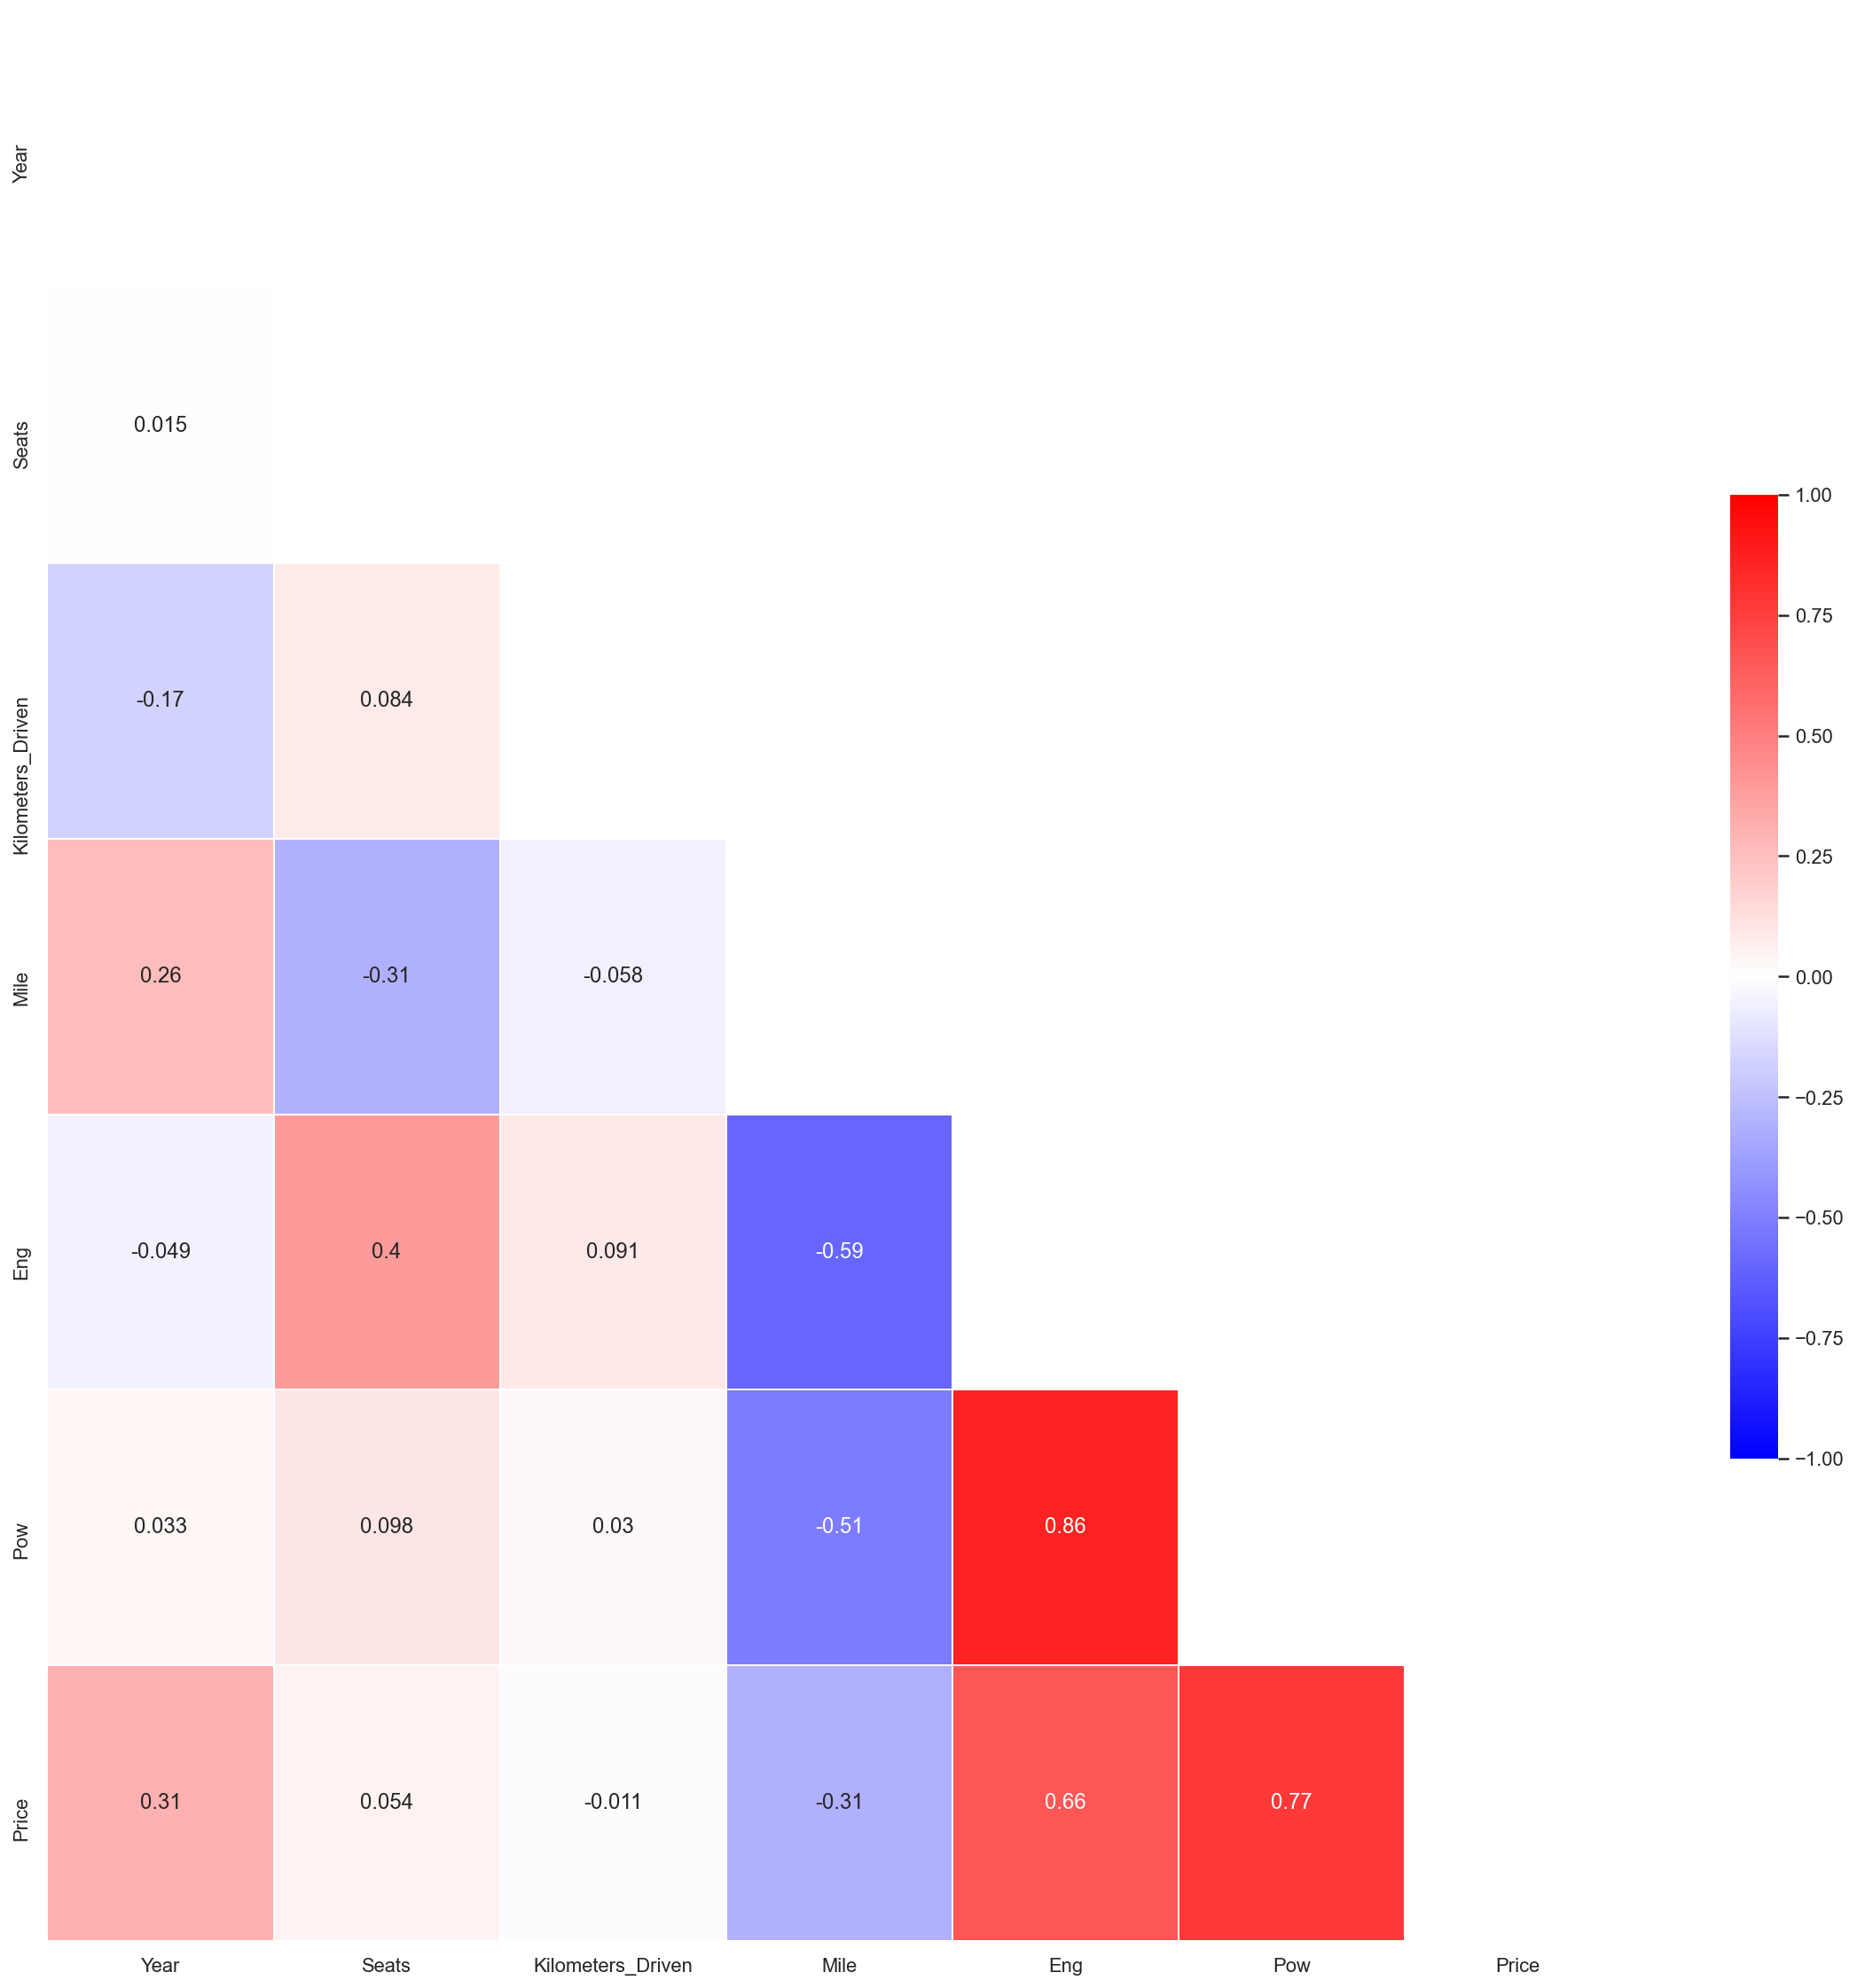

In [30]:
df = car_t[['Year', 'Seats', 'Kilometers_Driven', 'Mile', 'Eng', 'Pow', 'Price']].corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(20,20) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

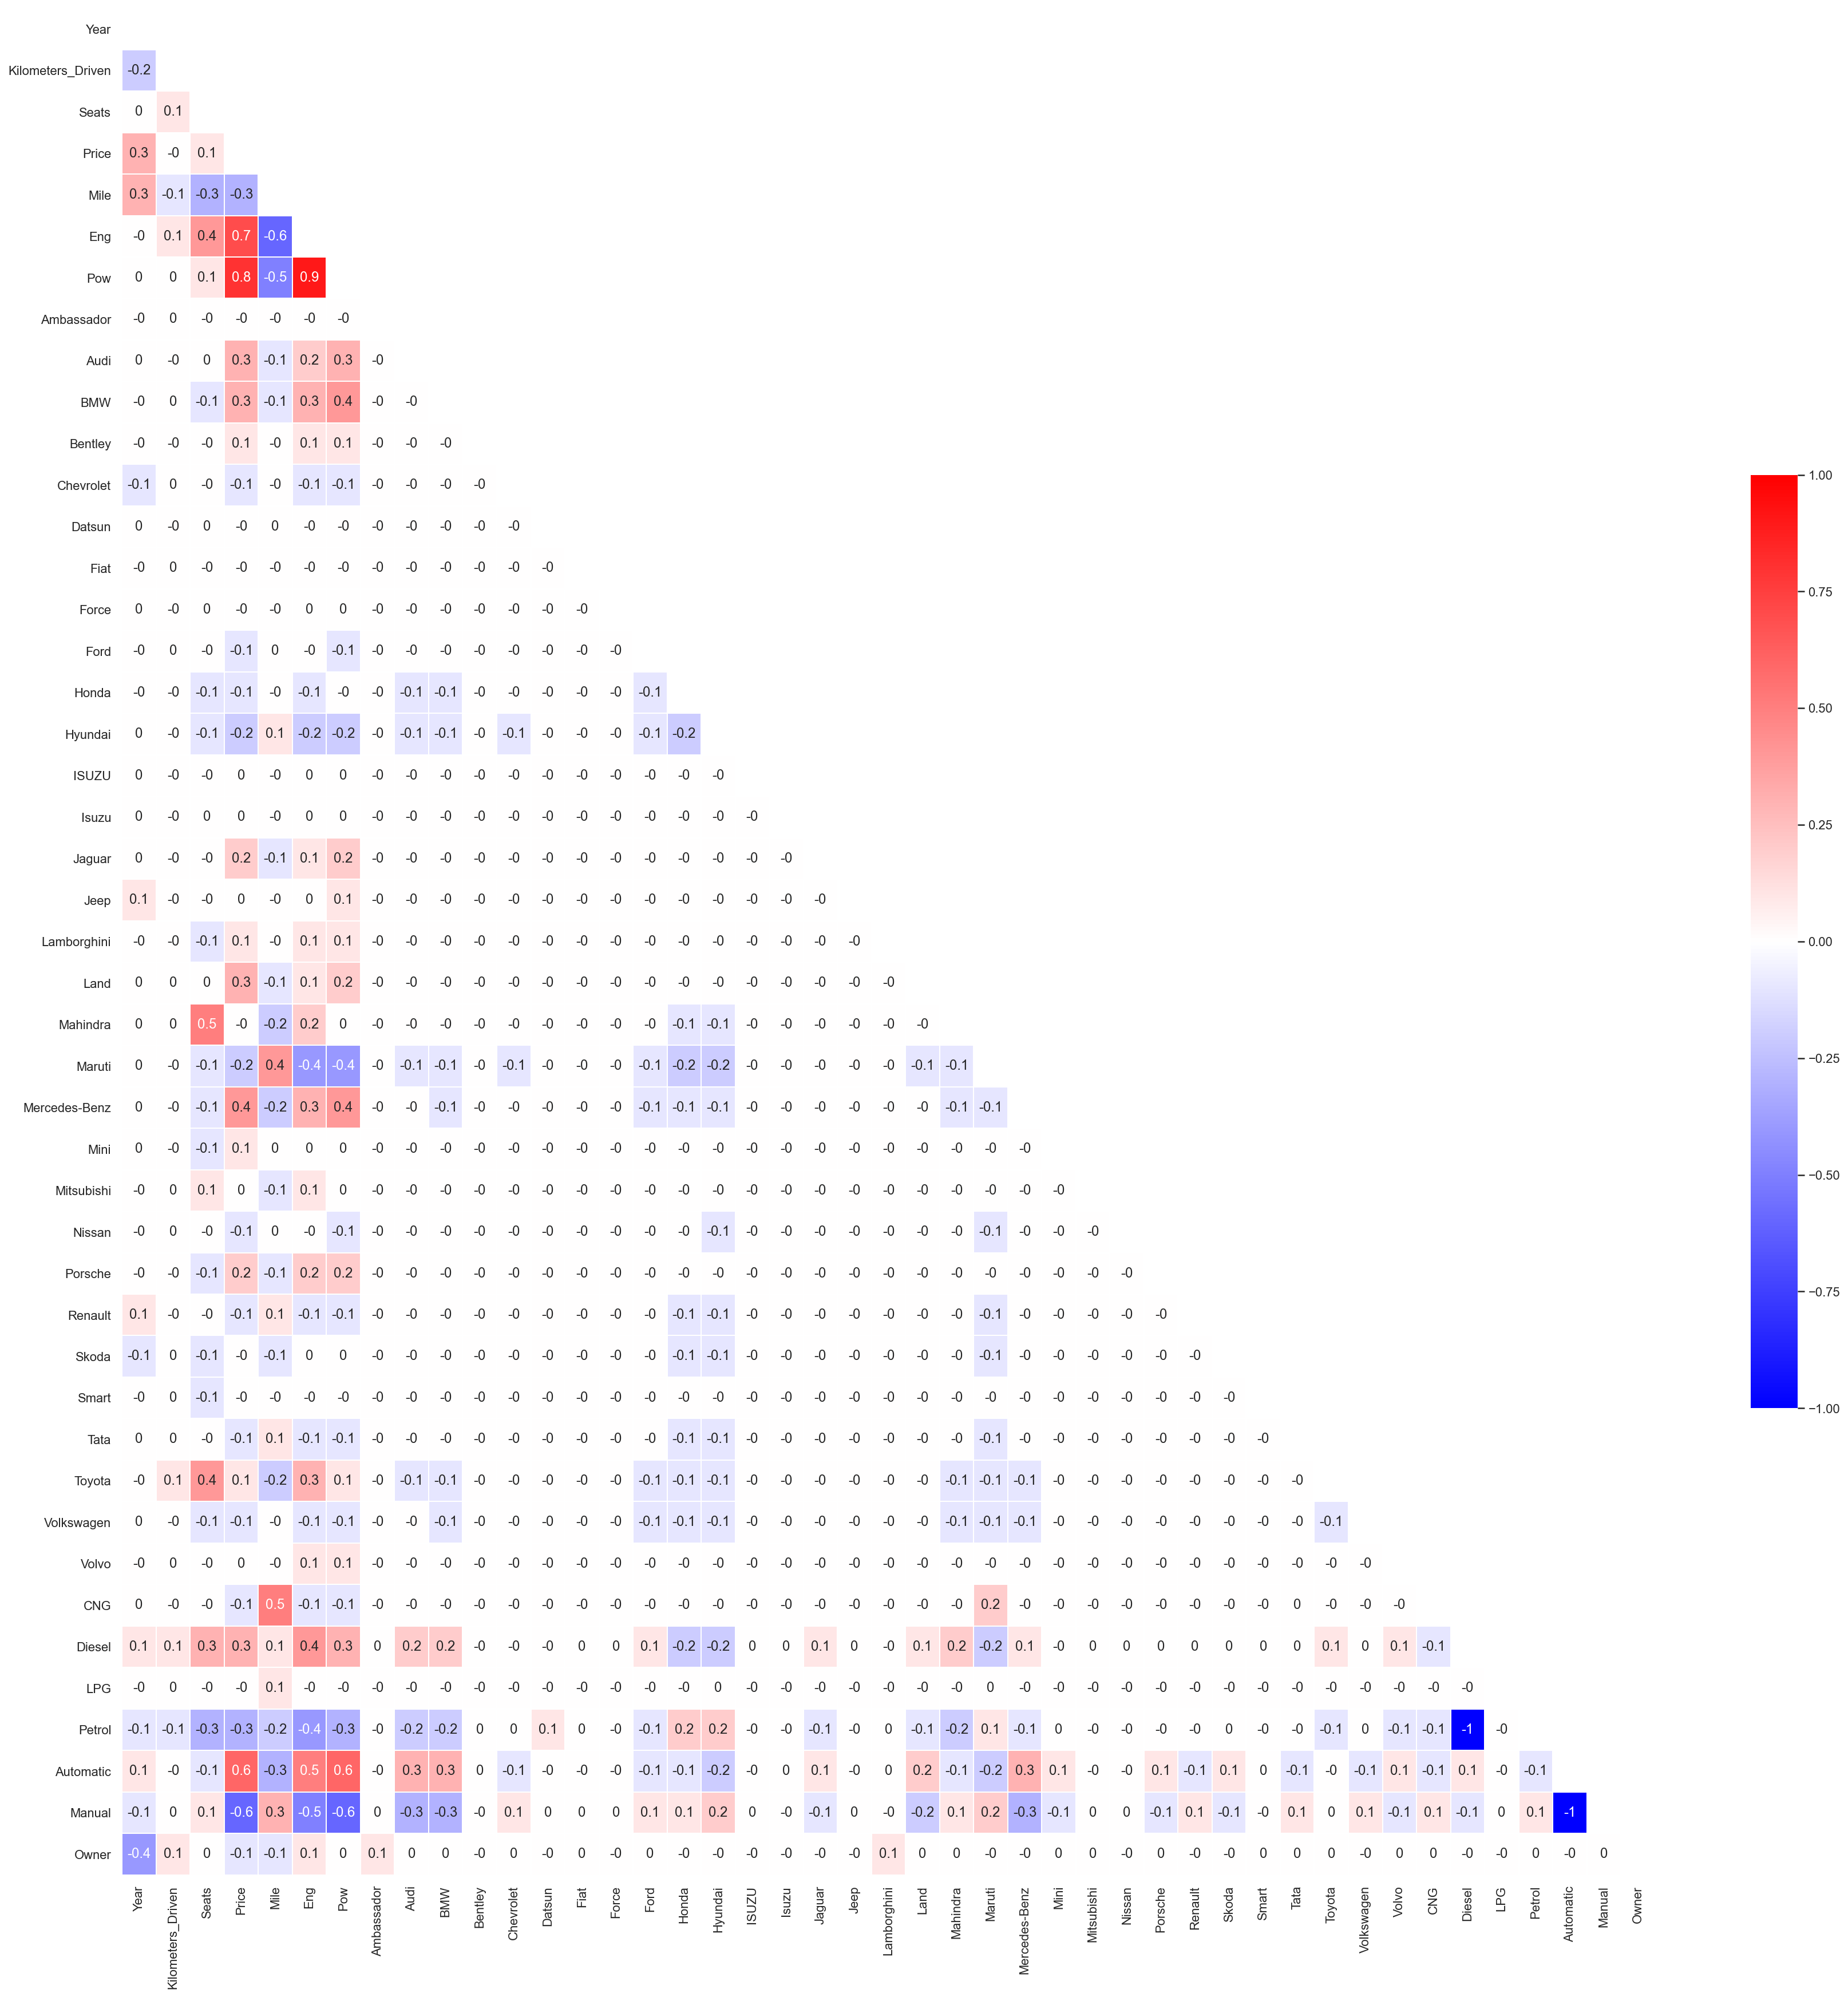

In [31]:
df = car_t.corr().round(1)
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(30,30) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [32]:
car_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6017 non-null   object 
 1   Location           6017 non-null   object 
 2   Year               6017 non-null   int64  
 3   Kilometers_Driven  6017 non-null   int64  
 4   Seats              6017 non-null   int64  
 5   New_Price          823 non-null    object 
 6   Price              6017 non-null   float64
 7   Brand              6017 non-null   object 
 8   Car_name           6017 non-null   object 
 9   Mile               6017 non-null   float64
 10  Eng                6017 non-null   float64
 11  Pow                6017 non-null   float64
 12  Ambassador         6017 non-null   uint8  
 13  Audi               6017 non-null   uint8  
 14  BMW                6017 non-null   uint8  
 15  Bentley            6017 non-null   uint8  
 16  Chevrolet          6017 

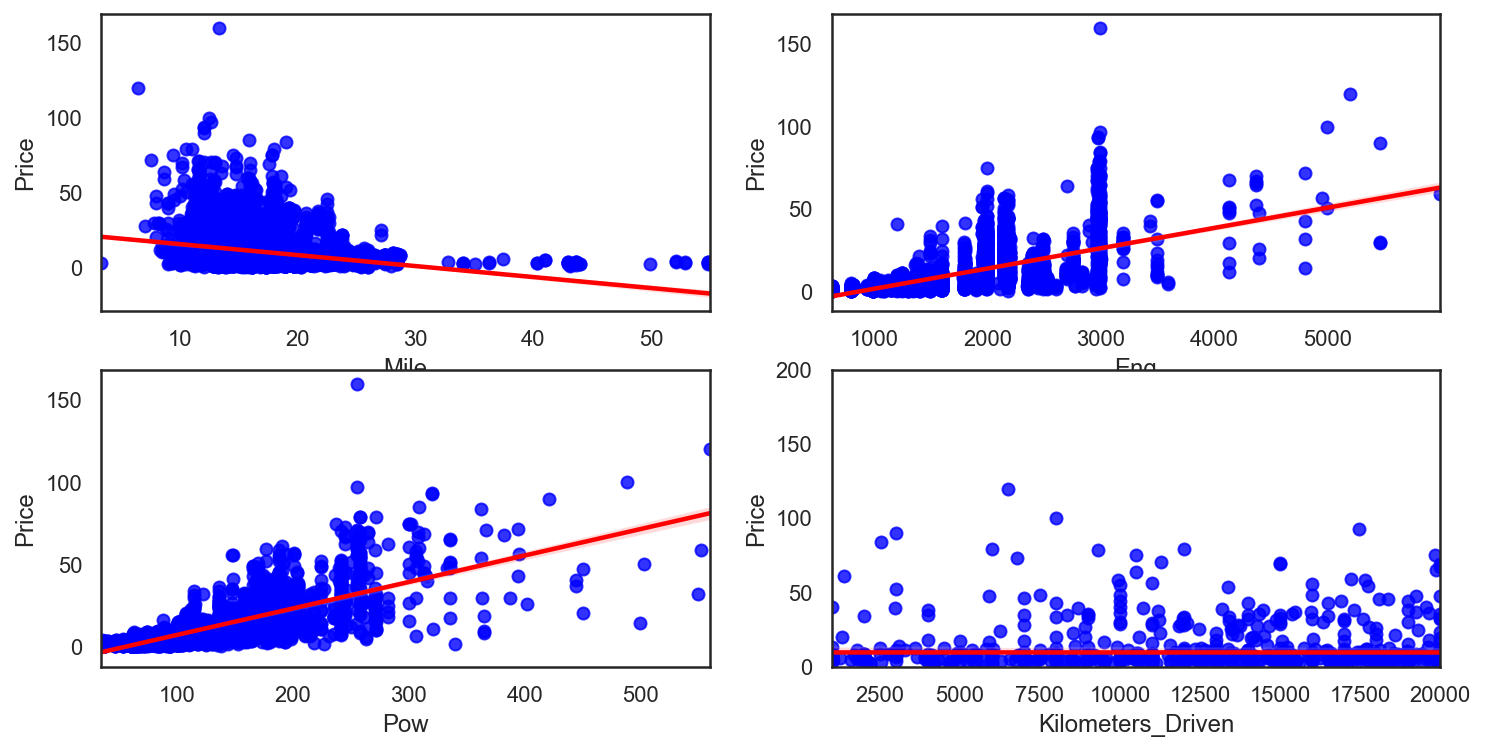

In [33]:
plt.figure(figsize=(12,6))

plt.subplot(221)
sns.regplot(x="Mile", y="Price",
                data=car_t, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(222)
sns.regplot(x="Eng", y="Price",
                data=car_t, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(223)
sns.regplot(x="Pow", y="Price",
                data=car_t, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(224)
sns.regplot(x="Kilometers_Driven", y="Price",
                data=car_t, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.axis([1000, 20000, 0, 200])
plt.show()

In [34]:
car_td = car_t.dropna()

In [35]:
car_td.reset_index(drop=True, inplace=True)

In [36]:
get_split(car_td, 'New_Price', 'new_price')

new_price


In [37]:
car_td['new_price'] = car_td['new_price'].astype(float)

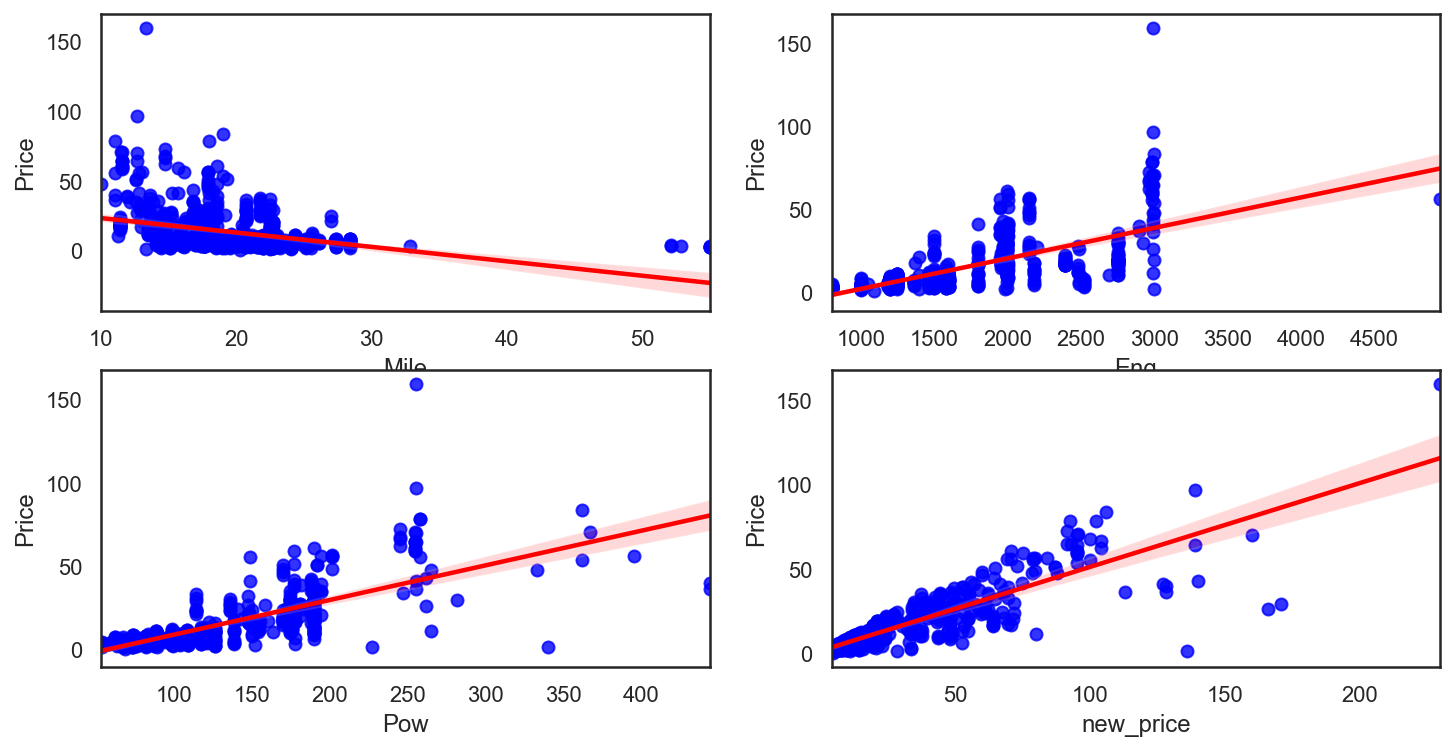

In [38]:
plt.figure(figsize=(12,6))
plt.axis([50, 500, 0, 200])

plt.subplot(221)
sns.regplot(x="Mile", y="Price",
                data=car_td, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(222)
sns.regplot(x="Eng", y="Price",
                data=car_td, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(223)
sns.regplot(x="Pow", y="Price",
                data=car_td, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(224)
sns.regplot(x="new_price", y="Price",
                data=car_td, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

In [39]:
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
x = car_td.drop(['Price','Name','Location','New_Price','Brand','Car_name'], axis=1)
y = car_td['Price']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

In [45]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [46]:
pred_test = reg.predict(x_test)

In [47]:
# 전처리후 drop new_price 사용
print('explained_variance_score: {}'.format(explained_variance_score(pred_test, y_test)))
print('mean_squared_errors: {}'.format(mean_squared_error(pred_test, y_test)))
print('r2_score: {}'.format(r2_score(pred_test, y_test)))

explained_variance_score: 0.7273686034338431
mean_squared_errors: 46.35748393234019
r2_score: 0.7256936237218992


In [48]:
def get_results(x, y):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

    reg = LinearRegression()
    reg.fit(x_train, y_train)

    pred_test = reg.predict(x_test)

    print('explained_variance_score: {}'.format(explained_variance_score(pred_test, y_test)))
    print('mean_squared_errors: {}'.format(mean_squared_error(pred_test, y_test)))
    print('r2_score: {}'.format(r2_score(pred_test, y_test)))

In [49]:
car_t.head()

,Name,Location,Year,Kilometers_Driven,Seats,New_Price,Price,Brand,Car_name,Mile,Eng,Pow,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Lamborghini,Land,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo,CNG,Diesel,LPG,Petrol,Automatic,Manual,Owner
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,5,NaN,1.75,Maruti,Wagon R LXI CNG,43.624,998.0,58.16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,5,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option,19.670,1582.0,126.20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2,Honda Jazz V,Chennai,2011,46000,5,8.61 Lakh,4.50,Honda,Jazz V,18.200,1199.0,88.70,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
3,Maruti Ertiga VDI,Chennai,2012,87000,7,NaN,6.00,Maruti,Ertiga VDI,20.770,1248.0,88.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,5,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic,15.200,1968.0,140.80,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2


In [50]:
x = car_t.drop(['Price','Name','New_Price', 'Location','Brand','Car_name'], axis=1)
y = car_t['Price']

In [51]:
# 브랜드등 전처리후
get_results(x, y)

explained_variance_score: 0.6855288143951654
mean_squared_errors: 29.800437683758197
r2_score: 0.6845285193585169


In [52]:
reg.score(x_train, y_train)

0.8888666188792038

In [53]:
reg.score(x_test, y_test)

0.7504273865572196

In [54]:
car_tr.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [55]:
car_tr.dropna(inplace=True)

In [56]:
len(car_tr)

823

In [57]:
car_tr.reset_index(drop=True, inplace=True)

In [58]:
get_split(car_tr, 'Mileage', 'Mile')
get_split(car_tr, 'Engine', 'Eng')
get_split(car_tr, 'Power', 'Pow')
get_split(car_tr, 'New_Price', 'new_price')

Mile
Eng
Pow
new_price


In [59]:
car_tr.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mile,Eng,Pow,new_price
0,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.2,1199,88.7,8.61
1,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50,11.36,2755,171.5,21
2,10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95,21.56,1462,103.25,10.65
3,15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01 Lakh,15.00,13.5,2477,175.56,32.01
4,20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,47.87 Lakh,18.55,22.69,1995,190,47.87


In [60]:
x = car_tr.drop(['Unnamed: 0','Location','Price','Name','New_Price','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power'], axis=1)
y = car_tr['Price']

In [61]:
# raw 데이터로 null값제거 823개
get_results(x, y)

explained_variance_score: 0.6518194945588607
mean_squared_errors: 62.23183504708037
r2_score: 0.6436665111804925


In [62]:
len(car_t['Location'].unique())

11

In [63]:
len(car_t['Brand'].unique())

31

In [64]:
car_t.head()

,Name,Location,Year,Kilometers_Driven,Seats,New_Price,Price,Brand,Car_name,Mile,Eng,Pow,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,ISUZU,Isuzu,Jaguar,Jeep,Lamborghini,Land,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo,CNG,Diesel,LPG,Petrol,Automatic,Manual,Owner
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,5,NaN,1.75,Maruti,Wagon R LXI CNG,43.624,998.0,58.16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,5,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option,19.670,1582.0,126.20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2,Honda Jazz V,Chennai,2011,46000,5,8.61 Lakh,4.50,Honda,Jazz V,18.200,1199.0,88.70,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
3,Maruti Ertiga VDI,Chennai,2012,87000,7,NaN,6.00,Maruti,Ertiga VDI,20.770,1248.0,88.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,5,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic,15.200,1968.0,140.80,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2


In [65]:
car_t['New_Price'].isnull().sum()

5194

## 질문
1. Owner
2. 지역을 dummy로?

## 앞으로
1. PCA와 그래프
1. 브랜드별 그래프, 가격 그래프, 데이터를 시각적으로 보여줄 수 있도록
2. scaling
3. 의미 없는 feature로 모델이 잘못 학습될 수 있으니 의미 없는 feature 제거
2. 모델 적용, 최적의 파라미터 탐색
3. MSE 수치 확인

In [82]:
car_8 = car_t[car_t['New_Price'].isnull()].head(823)

In [83]:
car_8.reset_index(drop=True, inplace=True)

In [85]:
x = car_8.drop(['Price','Name','Location','New_Price','Brand','Car_name'], axis=1)
y = car_8['Price']

In [86]:
get_results(x, y)

explained_variance_score: 0.5724737123135522
mean_squared_errors: 36.143846543883505
r2_score: 0.5687095020952826


In [87]:
car_8t = car_t[car_t['New_Price'].isnull()].tail(823)

car_8t.reset_index(drop=True, inplace=True)

x = car_8t.drop(['Price','Name','Location','New_Price','Brand','Car_name'], axis=1)
y = car_8t['Price']

get_results(x, y)

explained_variance_score: 0.515008400462114
mean_squared_errors: 38.20786576688193
r2_score: 0.5149880651918368


In [394]:
# def get_results2(x, y):

#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

#     reg = LinearRegression()
#     reg.fit(x_train, y_train)

#     pred_test = reg.predict(x_test)

    
#     return(mean_squared_error(pred_test, y_test))
   

In [396]:
# ls_1000 = []

In [406]:
# for _ in range(0,10000):
#     car_8s = car_t[car_t['New_Price'].isnull()].sample(n=823)

#     car_8s.reset_index(drop=True, inplace=True)

#     x = car_8s.drop(['Price','Name','Location','New_Price','Brand','Car_name'], axis=1)
#     y = car_8s['Price']

#     ls_1000.append(get_results2(x, y))

In [407]:
# ls_1000_pd = pd.DataFrame(ls_1000)

In [408]:
# len(ls_1000_pd)

11000

In [409]:
# len(ls_1000_pd[ls_1000_pd[0]>=46])/110

10.472727272727273